In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [35]:
df_covid_tweets = pd.read_csv('covid_tweets_sentiment.csv')
df_covid_tweets_sent = df_covid_tweets.copy()
print("Total COVID-tweets: " + str(df_covid_tweets_sent['tweet'].count()))

df_covid_tweets_sent = df_covid_tweets_sent.drop(['tweet'], axis='columns')
df_covid_tweets_sent['created at']=pd.to_datetime(df_covid_tweets_sent['created at'], utc= True).dt.date

parties = df_covid_tweets_sent['party'].unique()

df_non_covid_tweets = pd.read_csv('non_covid_tweets_sentiment.csv')
df_non_covid_tweets_sent = df_non_covid_tweets.copy()
print("Total non-COVID-tweets: " + str(df_non_covid_tweets_sent['tweet'].count()))

df_non_covid_tweets_sent = df_non_covid_tweets_sent.drop(['tweet'], axis='columns')
df_non_covid_tweets_sent['created at']=pd.to_datetime(df_non_covid_tweets_sent['created at'], utc= True).dt.date

pd.set_option('display.max_rows', None)

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

Total COVID-tweets: 44312
Total non-COVID-tweets: 210511


# Evaluation of the sentiment analysis: COVID-tweets

Number of COVID-tweets by party
party
AfD                      5112
Bündnis 90/Die Grünen    6906
CDU                      7141
CSU                      1021
Die Linke                7332
FDP                      7975
Fraktionslos              699
SPD                      8126
dtype: int64
Percentage of positive, neutral and negative COVID-tweets by party
Example: AfD (negative: 24.4%, neutral: 44.9%, positive: 30.6%)
sentiment  party                
negative   AfD                      24.432707
           Bündnis 90/Die Grünen    17.405155
           CDU                      16.090183
           CSU                      12.928501
           Die Linke                25.122750
           FDP                      20.037618
           Fraktionslos             19.885551
           SPD                      16.945607
neutral    AfD                      44.953052
           Bündnis 90/Die Grünen    42.426875
           CDU                      40.344490
           CSU                      38.

<ipython-input-36-9d99533a71e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_neutral['sentiment'] = 'neutral'
<ipython-input-36-9d99533a71e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos['sentiment'] = 'positive'
<ipython-input-36-9d99533a71e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

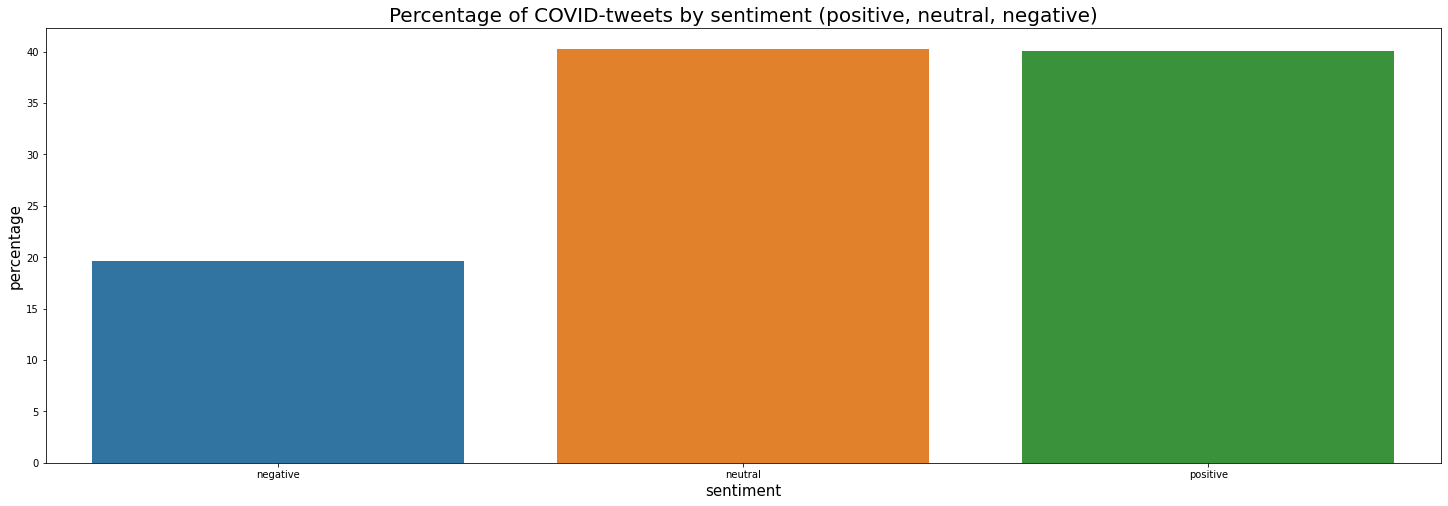

In [36]:
covid_tweets_overview = df_covid_tweets_sent.copy()

covid_tweets_neutral = covid_tweets_overview[covid_tweets_overview['polarity'] == 0.0]
covid_tweets_neutral['sentiment'] = 'neutral'
covid_tweets_pos = covid_tweets_overview[covid_tweets_overview['polarity'] > 0.0]
covid_tweets_pos['sentiment'] = 'positive'
covid_tweets_neg = covid_tweets_overview[covid_tweets_overview['polarity'] < 0.0]
covid_tweets_neg['sentiment'] = 'negative'

dfs = [covid_tweets_neutral, covid_tweets_pos, covid_tweets_neg]
concat_dfs = pd.concat(dfs)
new_df = concat_dfs.copy()
new_df = new_df.drop(['name', 'created at', 'polarity'], axis='columns')
print("Number of COVID-tweets by party")
print(new_df.groupby(['party']).size())
group1 = ((new_df.groupby(['sentiment', 'party']).size())/new_df.groupby(['party']).size())*100
print("Percentage of positive, neutral and negative COVID-tweets by party")
print("Example: AfD (negative: 24.4%, neutral: 44.9%, positive: 30.6%)")
print(group1)
group = new_df.groupby(['sentiment', 'party']).size()
print("Share of positive, neutral and negative COVID-tweets by party")
print("Example: AfD (negative: 1249 tweets, neutral: 2298 tweets, positive: 1565 tweets)")
print(group)

group_sentiment = concat_dfs.drop(['name', 'party', 'created at'], axis='columns')
group_sentiment = group_sentiment.groupby('sentiment').count()
group_sentiment = group_sentiment.rename(columns={'polarity': 'count'})
group_sentiment['percentage'] = ((group_sentiment['count'] / group_sentiment['count'].sum()) *100).round(1)

group_sentiment.reset_index(inplace=True)
print("Number and percentage of COVID-tweets by category (negative, neutral, positive)")
print(group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment,
                    x='sentiment',
                    y='percentage',)
chart.set_title("Percentage of COVID-tweets by sentiment (positive, neutral, negative)", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("percentage", fontsize = 15)
plt.show()

# Evaluation of the sentiment analysis: non-COVID-tweets

<ipython-input-37-0b4851100c6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_covid_tweets_neutral['sentiment'] = 'neutral'
<ipython-input-37-0b4851100c6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_covid_tweets_pos['sentiment'] = 'positive'
<ipython-input-37-0b4851100c6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Number of non-COVID-tweets by party
party
AfD                      20343
Bündnis 90/Die Grünen    34770
CDU                      37097
CSU                       3929
Die Linke                32810
FDP                      36489
Fraktionslos              6727
SPD                      38346
dtype: int64
Percentage of positive, neutral and negative non-COVID-tweets by party
Example: AfD (negative: 20.8%, neutral: 49.6%, positive: 29.5%)
sentiment  party                
negative   AfD                      20.817972
           Bündnis 90/Die Grünen    14.598792
           CDU                      12.987573
           CSU                      10.409773
           Die Linke                19.478817
           FDP                      15.078517
           Fraktionslos             17.214211
           SPD                      11.896938
neutral    AfD                      49.643612
           Bündnis 90/Die Grünen    51.380500
           CDU                      51.332992
           CSU         

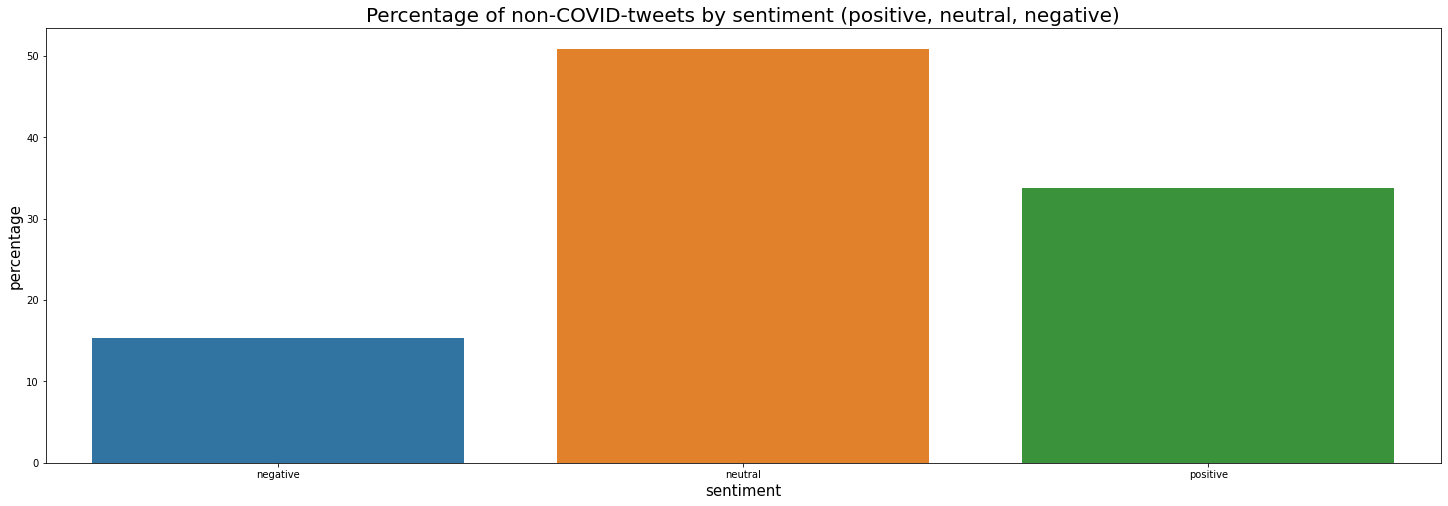

In [37]:
non_covid_tweets_overview = df_non_covid_tweets_sent.copy()

non_covid_tweets_neutral = non_covid_tweets_overview[non_covid_tweets_overview['polarity'] == 0.0]
non_covid_tweets_neutral['sentiment'] = 'neutral'
non_covid_tweets_pos = non_covid_tweets_overview[non_covid_tweets_overview['polarity'] > 0.0]
non_covid_tweets_pos['sentiment'] = 'positive'
non_covid_tweets_neg = non_covid_tweets_overview[non_covid_tweets_overview['polarity'] < 0.0]
non_covid_tweets_neg['sentiment'] = 'negative'

non_dfs = [non_covid_tweets_neutral, non_covid_tweets_pos, non_covid_tweets_neg]
non_concat_dfs = pd.concat(non_dfs)
new_df1 = non_concat_dfs.copy()
new_df1 = new_df1.drop(['name', 'created at', 'polarity'], axis='columns')
print("Number of non-COVID-tweets by party")
print(new_df1.groupby(['party']).size())
group12 = ((new_df1.groupby(['sentiment', 'party']).size())/new_df1.groupby(['party']).size())*100
print("Percentage of positive, neutral and negative non-COVID-tweets by party")
print("Example: AfD (negative: 20.8%, neutral: 49.6%, positive: 29.5%)")
print(group12)
group2 = new_df1.groupby(['sentiment', 'party']).size()
print("Share of positive, neutral and negative non-COVID-tweets by party")
print("Example: AfD (negative: 4235 tweets, neutral: 10099 tweets, positive: 6009 tweets)")
print(group2)
non_group_sentiment = non_concat_dfs.drop(['name', 'party', 'created at'], axis='columns')
non_group_sentiment = non_group_sentiment.groupby('sentiment').count()
non_group_sentiment = non_group_sentiment.rename(columns={'polarity': 'count'})
non_group_sentiment['percentage'] = ((non_group_sentiment['count'] / non_group_sentiment['count'].sum()) *100).round(1)

non_group_sentiment.reset_index(inplace=True)
print("Number and percentage of non-COVID-tweets by category (negative, neutral, positive)")
print(non_group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=non_group_sentiment,
                    x='sentiment',
                    y='percentage',)
chart.set_title("Percentage of non-COVID-tweets by sentiment (positive, neutral, negative)", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("percentage", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: COVID-tweets per party

Mean polarity of COVID-tweets per party
                   party  polarity
0                    AfD  0.030203
1  Bündnis 90/Die Grünen  0.099543
2                    CDU  0.119662
3                    CSU  0.134994
4              Die Linke  0.042031
5                    FDP  0.082255
6           Fraktionslos  0.071350
7                    SPD  0.132380


<ipython-input-38-b08a8b5960a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_neutral_per_party['sentiment'] = 'neutral'
<ipython-input-38-b08a8b5960a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos_per_party['sentiment'] = 'positive'
<ipython-input-38-b08a8b5960a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

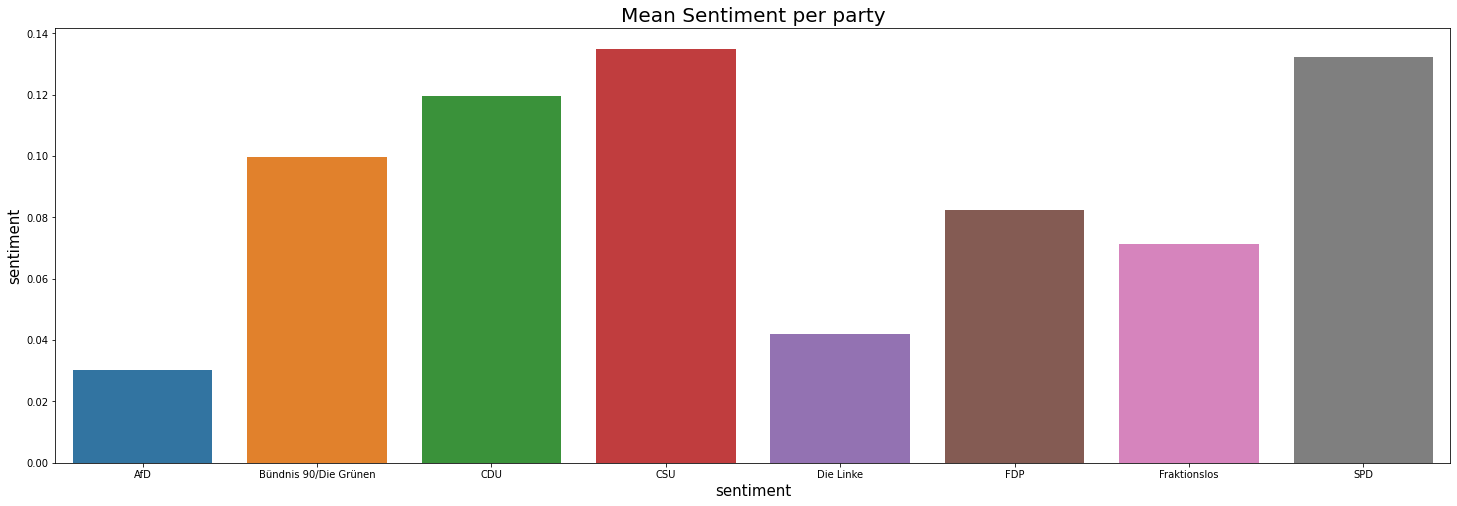

In [38]:
covid_tweets_per_party = df_covid_tweets_sent.copy()

covid_tweets_neutral_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] == 0.0]
covid_tweets_neutral_per_party['sentiment'] = 'neutral'
covid_tweets_pos_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] > 0.0]
covid_tweets_pos_per_party['sentiment'] = 'positive'
covid_tweets_neg_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] < 0.0]
covid_tweets_neg_per_party['sentiment'] = 'negative'

dfs = [covid_tweets_neutral_per_party, covid_tweets_pos_per_party, covid_tweets_neg_per_party]
concat_dfs = pd.concat(dfs)

group_sentiment = concat_dfs.drop(['name','created at'], axis='columns')

group_sentiment = group_sentiment[['party', 'polarity']].groupby('party').mean()

group_sentiment.reset_index(inplace=True)
print("Mean polarity of COVID-tweets per party")
print(group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment,
                    x='party',
                    y='polarity',)
chart.set_title("Mean Sentiment per party", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("sentiment", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: non-COVID-tweets per party

<ipython-input-39-d6f2b164ddd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_covid_tweets_neutral_per_party['sentiment'] = 'neutral'
<ipython-input-39-d6f2b164ddd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_covid_tweets_pos_per_party['sentiment'] = 'positive'
<ipython-input-39-d6f2b164ddd8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

Mean polarity of non-COVID-tweets per party
                   party  polarity
0                    AfD  0.040615
1  Bündnis 90/Die Grünen  0.102099
2                    CDU  0.112161
3                    CSU  0.127776
4              Die Linke  0.055970
5                    FDP  0.089597
6           Fraktionslos  0.070178
7                    SPD  0.128887


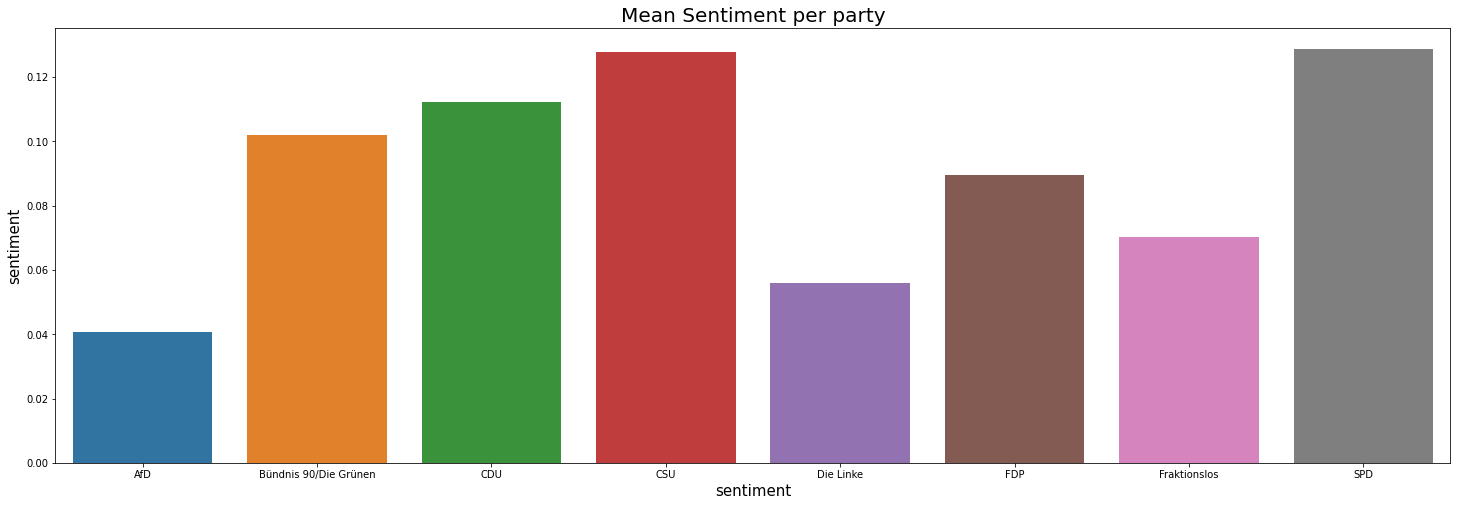

In [39]:
df_non_covid_tweets_per_party = df_non_covid_tweets_sent.copy()

df_non_covid_tweets_neutral_per_party = df_non_covid_tweets_per_party[df_non_covid_tweets_per_party['polarity'] == 0.0]
df_non_covid_tweets_neutral_per_party['sentiment'] = 'neutral'
df_non_covid_tweets_pos_per_party = df_non_covid_tweets_per_party[df_non_covid_tweets_per_party['polarity'] > 0.0]
df_non_covid_tweets_pos_per_party['sentiment'] = 'positive'
df_non_covid_tweets_neg_per_party = df_non_covid_tweets_per_party[df_non_covid_tweets_per_party['polarity'] < 0.0]
df_non_covid_tweets_neg_per_party['sentiment'] = 'negative'

dfs = [df_non_covid_tweets_neutral_per_party, df_non_covid_tweets_pos_per_party, df_non_covid_tweets_neg_per_party]
concat_dfs = pd.concat(dfs)

group_sentiment = concat_dfs.drop(['name','created at'], axis='columns')

group_sentiment = group_sentiment[['party', 'polarity']].groupby('party').mean()

group_sentiment.reset_index(inplace=True)
print("Mean polarity of non-COVID-tweets per party")
print(group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment,
                    x='party',
                    y='polarity',)
chart.set_title("Mean Sentiment per party", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("sentiment", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: COVID-tweets per party
# (Boxplot with outliers)

<ipython-input-40-4ae017dc8d17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_per_party['sentiment'] = 'neutral'
<ipython-input-40-4ae017dc8d17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos_per_party['sentiment'] = 'positive'
<ipython-input-40-4ae017dc8d17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

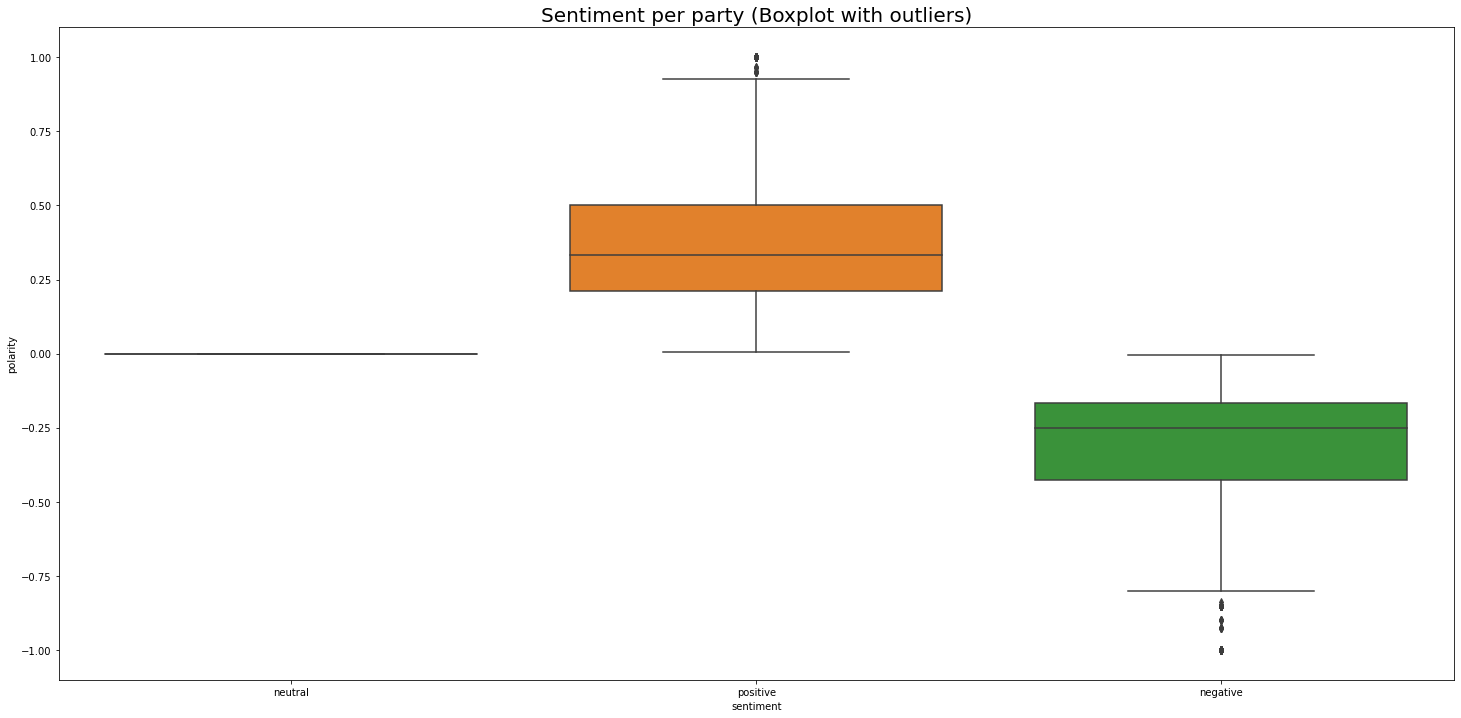

In [40]:

boxplot_per_party = df_covid_tweets_sent.copy()

boxplot_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] == 0.0]
boxplot_per_party['sentiment'] = 'neutral'
covid_tweets_pos_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] > 0.0]
covid_tweets_pos_per_party['sentiment'] = 'positive'
covid_tweets_neg_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] < 0.0]
covid_tweets_neg_per_party['sentiment'] = 'negative'

dfs = [covid_tweets_neutral_per_party, covid_tweets_pos_per_party, covid_tweets_neg_per_party]
concat_dfs = pd.concat(dfs)

group_sentiment = concat_dfs.drop(['name','created at'], axis='columns')
#print(group_sentiment)

plt.figure(figsize=(25, 12))
chart = sns.boxplot(data=group_sentiment,
                    x='sentiment',
                    y='polarity')
chart.set_title("Sentiment per party (Boxplot with outliers)", fontsize = 20)
plt.show()

# Evaluation of the Sentiment analysis: Weekly average polarity of COVID-tweets throughout the year

Mean polarity of the year: 0.08385772727659355
Max polarity of the year: 0.34285714285714286
Min polarity of the year: -0.0296236559139785


<ipython-input-41-ee6ba87a6e5c>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  covid_tweets_year['week_number_of_year'] = covid_tweets_year['created at'].dt.week


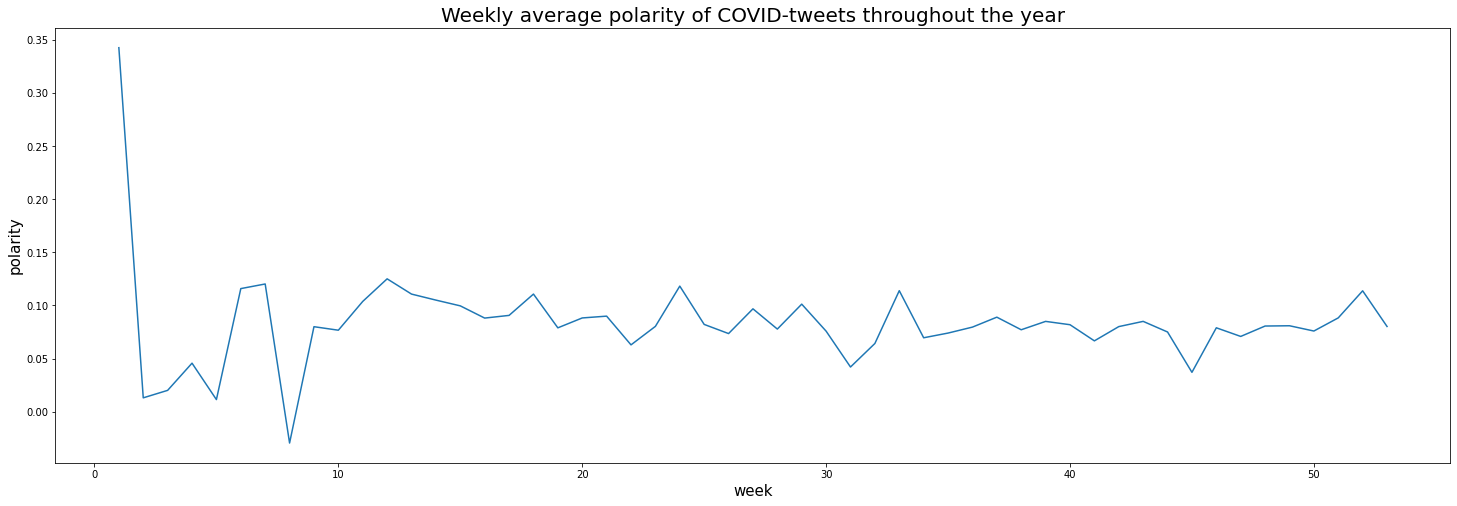

In [41]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)

covid_tweets_year = df_covid_tweets_sent.copy()
covid_tweets_year  = covid_tweets_year.drop(['name'], axis='columns')
covid_tweets_year = covid_tweets_year.loc[(covid_tweets_year['created at'] >= start_date) & (covid_tweets_year['created at'] <= end_date)]

covid_tweets_year['created at'] = pd.to_datetime(covid_tweets_year['created at'])
covid_tweets_year['week_number_of_year'] = covid_tweets_year['created at'].dt.week
covid_tweets_year = covid_tweets_year.pivot_table(index=['week_number_of_year'], aggfunc='mean')
#print(covid_tweets_year)
print("Mean polarity of the year: " + str(covid_tweets_year['polarity'].mean()))
print("Max polarity of the year: " + str(covid_tweets_year['polarity'].max()))
print("Min polarity of the year: " + str(covid_tweets_year['polarity'].min()))

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=covid_tweets_year,)
plt.title("Weekly average polarity of COVID-tweets throughout the year", fontsize = 20)
plt.xlabel("week", fontsize = 15)
plt.ylabel("polarity", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: Weekly average polarity of non-COVID-tweets throughout the year

<ipython-input-42-b8aa83c131cd>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  non_covid_tweets_year['week_number_of_year'] = non_covid_tweets_year['created at'].dt.week


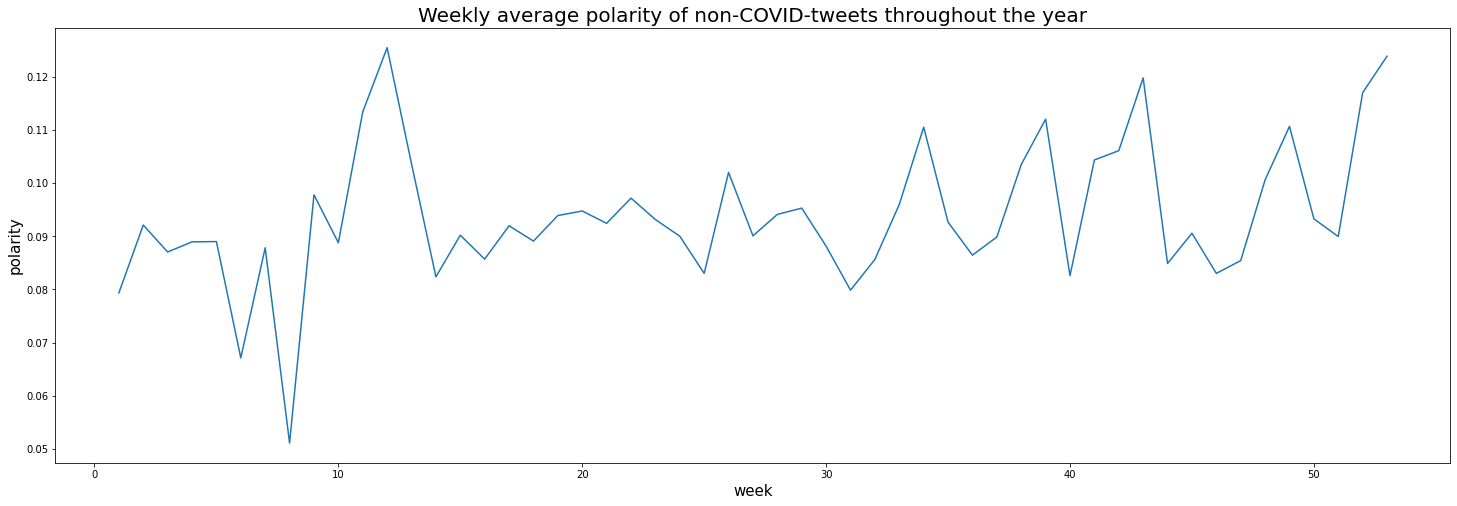

Mean polarity of the year: 0.09383869463604229
Max polarity of the year: 0.12547463514866725
Min polarity of the year: 0.05109757598129689


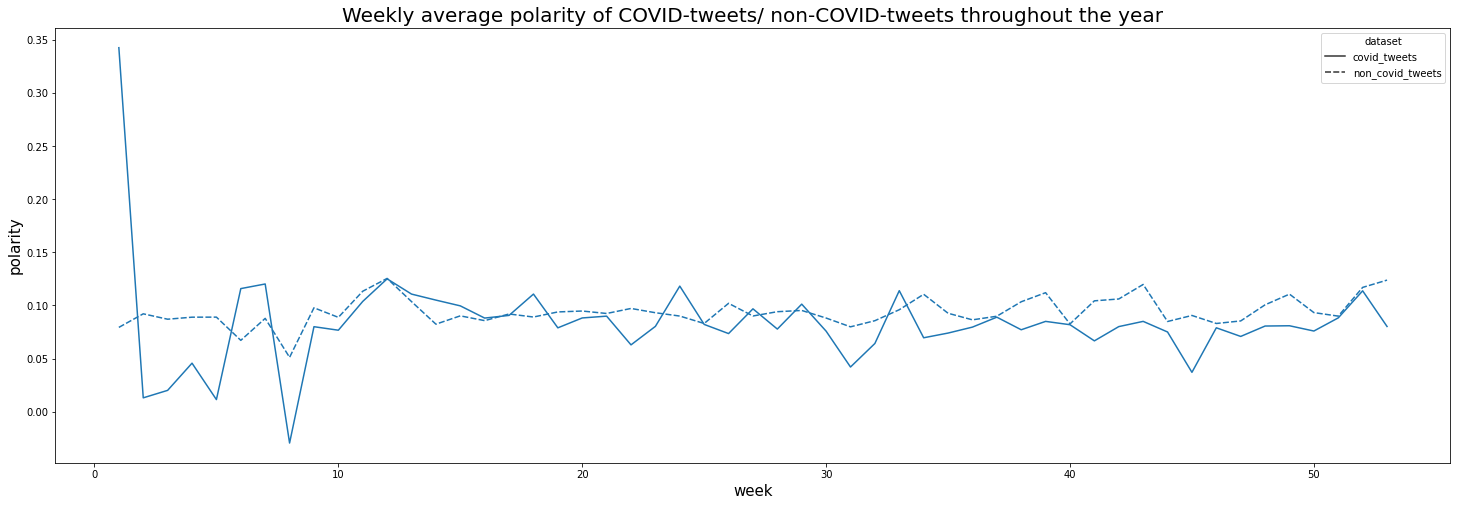

In [42]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)

non_covid_tweets_year = df_non_covid_tweets_sent.copy()
non_covid_tweets_year  = non_covid_tweets_year.drop(['name'], axis='columns')
non_covid_tweets_year = non_covid_tweets_year.loc[(non_covid_tweets_year['created at'] >= start_date) & (non_covid_tweets_year['created at'] <= end_date)]

non_covid_tweets_year['created at'] = pd.to_datetime(non_covid_tweets_year['created at'])
non_covid_tweets_year['week_number_of_year'] = non_covid_tweets_year['created at'].dt.week
non_covid_tweets_year = non_covid_tweets_year.pivot_table(index=['week_number_of_year'], aggfunc='mean')
#print(non_covid_tweets_year)

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=non_covid_tweets_year,)
plt.title("Weekly average polarity of non-COVID-tweets throughout the year", fontsize = 20)
plt.xlabel("week", fontsize = 15)
plt.ylabel("polarity", fontsize = 15)
plt.show()


print("Mean polarity of the year: " + str(non_covid_tweets_year['polarity'].mean()))
print("Max polarity of the year: " + str(non_covid_tweets_year['polarity'].max()))
print("Min polarity of the year: " + str(non_covid_tweets_year['polarity'].min()))

concatenated_sentiment_year = pd.concat([covid_tweets_year.assign(dataset='covid_tweets'), non_covid_tweets_year.assign(dataset='non_covid_tweets')])
#print(concatenated_sentiment_year)
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=concatenated_sentiment_year,
                     style='dataset')
plt.title("Weekly average polarity of COVID-tweets/ non-COVID-tweets throughout the year", fontsize = 20)
plt.xlabel("week", fontsize = 15)
plt.ylabel("polarity", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: Weekly average polarity of COVID-tweets per party throughout the year

<ipython-input-43-fe2e728a9a2f>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  covid_tweets_party_year['week_number_of_year'] = covid_tweets_party_year['created at'].dt.week
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Average polarity per party per week


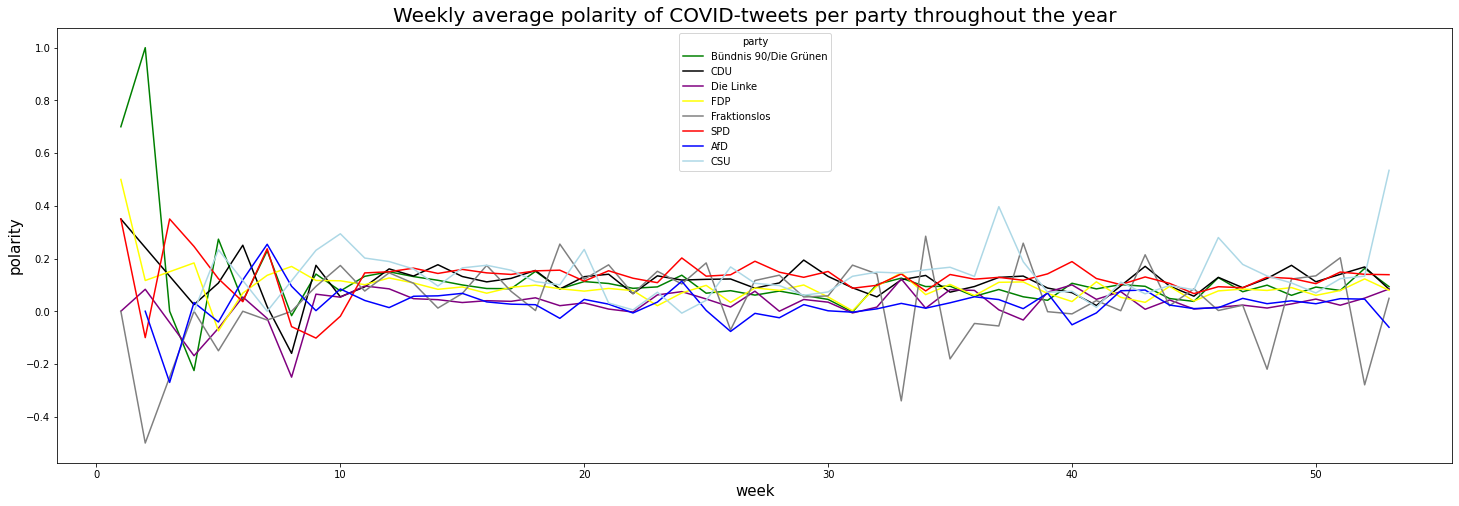

In [43]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)

covid_tweets_party_year = df_covid_tweets_sent.copy()
covid_tweets_party_year  = covid_tweets_party_year.drop(['name'], axis='columns')
covid_tweets_party_year = covid_tweets_party_year.loc[(covid_tweets_party_year['created at'] >= start_date) & (covid_tweets_party_year['created at'] <= end_date)]

covid_tweets_party_year['created at'] = pd.to_datetime(covid_tweets_party_year['created at'])
covid_tweets_party_year['week_number_of_year'] = covid_tweets_party_year['created at'].dt.week
print("Average polarity per party per week")
print(covid_tweets_party_year)
covid_tweets_party_year = covid_tweets_party_year.pivot_table(index=['week_number_of_year', 'party'], aggfunc='mean')

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=covid_tweets_party_year,
                     hue='party',
                     palette=party_colors)
plt.title("Weekly average polarity of COVID-tweets per party throughout the year", fontsize = 20)
plt.xlabel("week", fontsize = 15)
plt.ylabel("polarity", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: Weekly average polarity of non-COVID-tweets per party throughout the year

<ipython-input-44-905a76674e65>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  non_covid_tweets_party_year['week_number_of_year'] = non_covid_tweets_party_year['created at'].dt.week


Average polarity per party per week
                                           polarity
week_number_of_year party                          
1                   AfD                    0.009125
                    Bündnis 90/Die Grünen  0.091001
                    CDU                    0.093934
                    CSU                    0.046196
                    Die Linke              0.027035
                    FDP                    0.144818
                    Fraktionslos           0.071680
                    SPD                    0.108134
2                   AfD                    0.035600
                    Bündnis 90/Die Grünen  0.100916
                    CDU                    0.087359
                    CSU                    0.168594
                    Die Linke              0.051816
                    FDP                    0.105103
                    Fraktionslos           0.045367
                    SPD                    0.145512
3                   AfD     

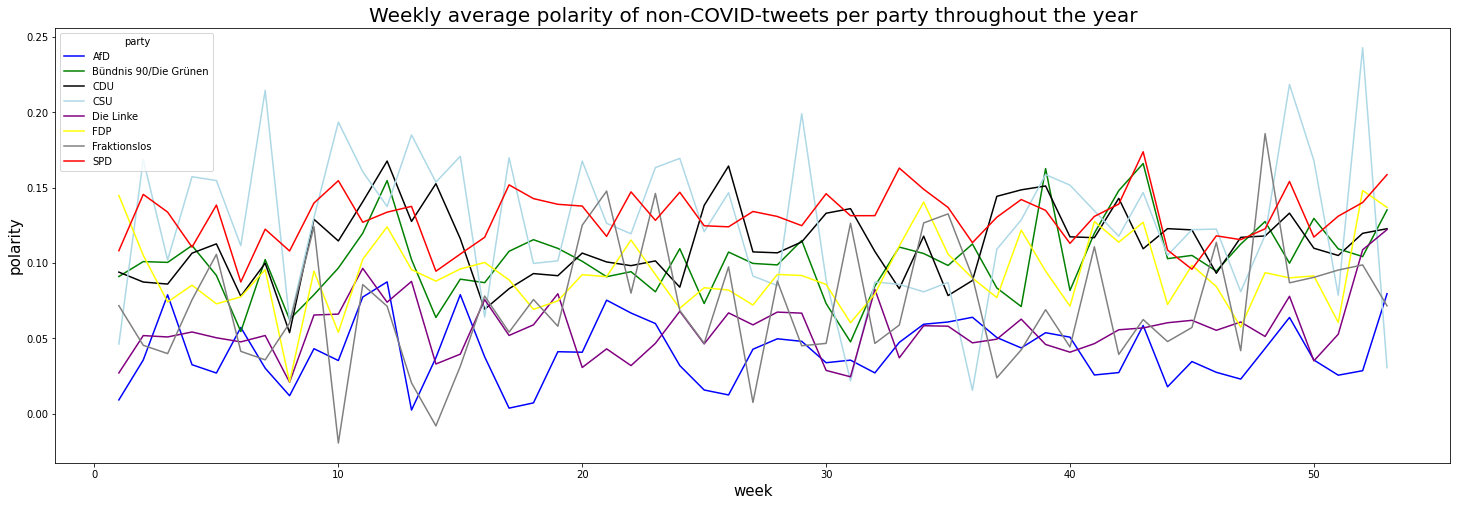

In [44]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)

non_covid_tweets_party_year = df_non_covid_tweets_sent.copy()
non_covid_tweets_party_year  = non_covid_tweets_party_year.drop(['name'], axis='columns')
non_covid_tweets_party_year = non_covid_tweets_party_year.loc[(non_covid_tweets_party_year['created at'] >= start_date) & (non_covid_tweets_party_year['created at'] <= end_date)]

non_covid_tweets_party_year['created at'] = pd.to_datetime(non_covid_tweets_party_year['created at'])
non_covid_tweets_party_year['week_number_of_year'] = non_covid_tweets_party_year['created at'].dt.week
non_covid_tweets_party_year = non_covid_tweets_party_year.pivot_table(index=['week_number_of_year', 'party'], aggfunc='mean')
print("Average polarity per party per week")
print(non_covid_tweets_party_year)
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=non_covid_tweets_party_year,
                     hue='party',
                     palette=party_colors)
plt.title("Weekly average polarity of non-COVID-tweets per party throughout the year", fontsize = 20)
plt.xlabel("week", fontsize = 15)
plt.ylabel("polarity", fontsize = 15)
plt.show()

# Evaluation of the Sentiment analysis: Weekly average polarity of tweets (COVID-tweets and non-COVID-tweets) per party throughout the year

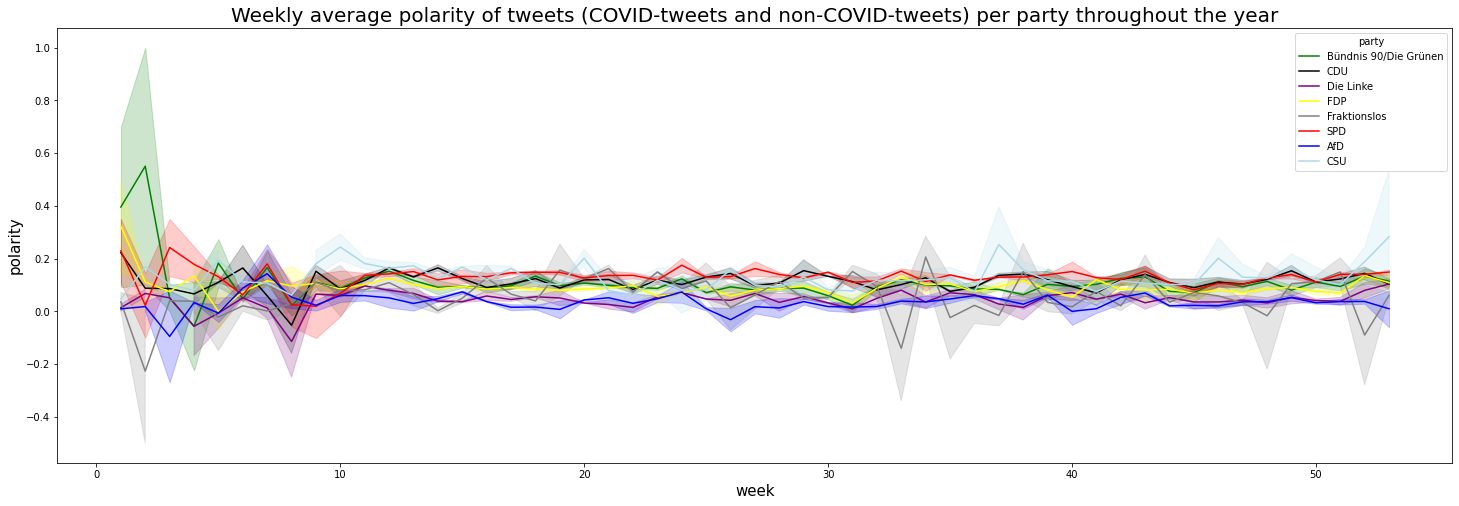

In [45]:
concatenated_sentiment_party_year = pd.concat([covid_tweets_party_year.assign(dataset='covid_tweets'), non_covid_tweets_party_year.assign(dataset='non_covid_tweets')])
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=concatenated_sentiment_party_year,
                     hue='party',
                     palette=party_colors)
plt.title("Weekly average polarity of tweets (COVID-tweets and non-COVID-tweets) per party throughout the year", fontsize = 20)
plt.xlabel("week", fontsize = 15)
plt.ylabel("polarity", fontsize = 15)
plt.show()